# Homework 7, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/).

Some of the questions get kind of weird in this one, especially later on. **Feel free to lean on ChatGPT for the crazier ones!** It might be an interesting exploration of how to ask problems or explain what your dataset looks like.

## Do your importing and your setup

In [1]:
#importing pandas
import pandas as pd

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [27]:
#reading the pdf
df = pd.read_excel(
    'NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx',
    nrows= 30000,
    na_values=['','0','NaN','Unknown','UNKNOWN'],
) 

#first 5 rows
df.head()


,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Owner Zip Code          30000 non-null  int64         
 1   Animal Name             29539 non-null  object        
 2   Animal Gender           30000 non-null  object        
 3   Primary Breed           25223 non-null  object        
 4   Secondary Breed         3974 non-null   object        
 5   Animal Dominant Color   29885 non-null  object        
 6   Animal Secondary Color  20946 non-null  object        
 7   Animal Third Color      6629 non-null   object        
 8   Animal Birth            30000 non-null  datetime64[ns]
 9   Spayed or Neut          30000 non-null  object        
 10  Guard or Trained        19826 non-null  object        
 11  Vaccinated              30000 non-null  object        
 12  Application Date        30000 non-null  dateti

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [ ]:
#the dataset includes all the pet licensing data including breed, owner address, and animal names for New York City, through April 2016. 
#each row represents a license for a pet
#Spayed or Neut: column indicates whether the pet was spayed or neutered
#Vaccinated: column indicates whether the pet was vaccinated

# Your thoughts

Think of three questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

In [ ]:
#1. what are the vaccinations a pet needs in order to get a 'yes' in the vaccination column?
#2. How do you determine the primary breed? how can it be unknown and the secondary breed be known?
#3.What is the Application date? is the day the application was filed by the owner or the date the authority started processing it?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

<Axes: >

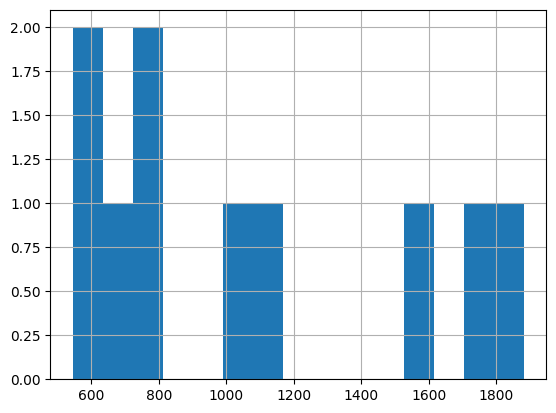

In [29]:
df['Primary Breed']. value_counts().head(10).hist(bins=15)

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

<Axes: >

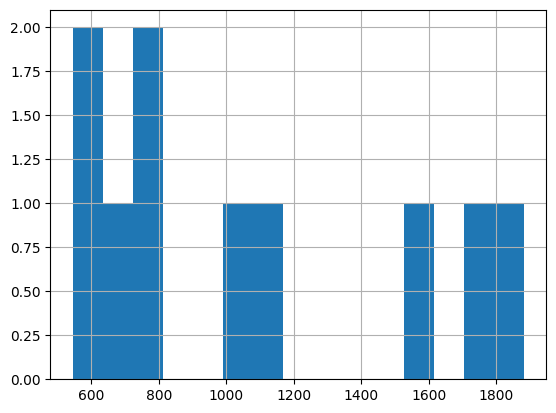

In [30]:
df['Primary Breed'].value_counts(dropna= True).head(10).hist(bins = 15)



## What are the most popular dog names?

In [32]:
df['Animal Name'].value_counts(dropna= True).head()

Animal Name
Max        202
Bella      193
Charlie    172
Lola       146
Rocky      140
Name: count, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [37]:
df[df['Animal Name'].isin(['Dimuthu','Max','Maxwell'])]['Animal Name'].value_counts()


Animal Name
Max        202
Maxwell     11
Name: count, dtype: int64

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [42]:
df['Guard or Trained'].value_counts(normalize=True)

Guard or Trained
No     0.999143
Yes    0.000857
Name: proportion, dtype: float64

## What are the actual numbers?

In [43]:
df['Guard or Trained'].value_counts()

Guard or Trained
No     19809
Yes       17
Name: count, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [44]:
df['Guard or Trained'].value_counts(dropna= False)

Guard or Trained
No     19809
NaN    10174
Yes       17
Name: count, dtype: int64

## Fill in all of those empty "Guard or Trained" columns with "No"

**We're maing a big assumption** here that if they aren't listed as guard dogs, they probably aren't guard dogs.

Look up `.fillna`. Check your result with another `.value_counts()`

In [50]:

df['Guard or Trained'] = df['Guard or Trained'].fillna('NO')
df['Guard or Trained'].value_counts()

#assigned the wrong 'NO', reversing:
df['Guard or Trained'] = df['Guard or Trained'].replace('NO', 'No')
df['Guard or Trained'].value_counts()


Guard or Trained
No     29983
Yes       17
Name: count, dtype: int64

## What are the top dog breeds for guard dogs? 

In [53]:
df[df['Guard or Trained'] == 'Yes']['Primary Breed'].value_counts().head()


Primary Breed
German Shepherd Dog           3
Poodle, Standard              1
German Shepherd Crossbreed    1
Labrador Retriever            1
Doberman Pinscher             1
Name: count, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with `df['Animal Birth'].dt.year` or `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [57]:
df['Year'] = df['Animal Birth'].dt.year
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [60]:
#assume dogs are alive by 2025
df['age'] = 2025 - df['Year']
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year,age
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,18
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,12
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,11
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,17
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,11


# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

Here's an example of how you can merge two dataframes:

```python
merged = prisons_df.merge(states_df, left_on='state', right_on='name')
```

In the example above, `prisons_df` has a column called `state` that matches with the `name` column of `states_df`. The columns of `states_df` are then added to `prisons_df` and returned as a new dataframe called `merged`.

> **Rows without a match get discarded because it is an [inner join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).** I think left joins are probably the most common (keep rows from the "left" df even if they don't have a match in the right. For example, by default a prison with the state of `PUERTO RICO` would be dropped if PR wasn't in `states_df`, but if you changed it to `how='left'` it would be preserved, but the additional columns would just be `NaN`.

In [ ]:
#reading the csv
neighborhoods_df = pd.read_csv('zipcodes-neighborhoods.csv')
neighborhoods_df.head()

#merging the files
merged = df.merge(neighborhoods_df, left_on='Owner Zip Code', right_on='zip')
merged.head()




,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,Year,age,neighborhood,zip,borough
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,18,Upper West Side,10024,Manhattan
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,12,Southeast Bronx,10461,Bronx
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,11,Greenwich Village and Soho,10013,Manhattan
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,17,Upper West Side,10025,Manhattan
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,11,Greenwich Village and Soho,10013,Manhattan


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [106]:

(merged[
    merged['borough'].isin(['Bronx', 'Brooklyn']) |
    (merged['neighborhood'] == 'Upper East Side')
]
 .groupby(['borough'])['Animal Name']
 .value_counts()
 .groupby(level=0)
 .head(1)
)



borough    Animal Name
Bronx      Bella          22
Brooklyn   Max            46
Manhattan  Charlie        19
Name: count, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [ ]:
merged.groupby('neighborhood')['Primary Breed'].value_counts().groupby(level=0).head(1)


neighborhood                   Primary Breed                       
Borough Park                   Yorkshire Terrier                        49
Bronx Park and Fordham         Yorkshire Terrier                        39
Bushwick and Williamsburg      Yorkshire Terrier                        47
Canarsie and Flatlands         Shih Tzu                                 56
Central Bronx                  Yorkshire Terrier                        29
Central Brooklyn               Shih Tzu                                 52
Central Harlem                 Chihuahua                                48
Central Queens                 Yorkshire Terrier                        34
Chelsea and Clinton            Chihuahua                                80
East Harlem                    Yorkshire Terrier                        44
East New York and New Lots     Yorkshire Terrier                        25
Flatbush                       Shih Tzu                                 38
Gramercy Park and Murray Hill  Y

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

Be conscious of case-sensitivity! `WHITE` and `white` aren't the same, so you might need to standardize first.

Using `.isin` is going to be very helpful.

In [ ]:
#creating the new column
merged['monochrome']= (
    merged[["Animal Dominant Color", "Animal Secondary Color", "Animal Third Color"]]
    .apply(lambda row: all((str(c).lower() in ["black", "white", "grey", "gray"]) or pd.isna(c) for c in row), axis=1)
)

#number of monochorome animals
merged['monochrome'].value_counts()

monochrome
False    21301
True      8272
Name: count, dtype: int64

## How many dogs are in each borough? Plot it in a graph.

<Axes: title={'center': 'Number of licensed dogs in the boroughs in NYC'}, ylabel='borough'>

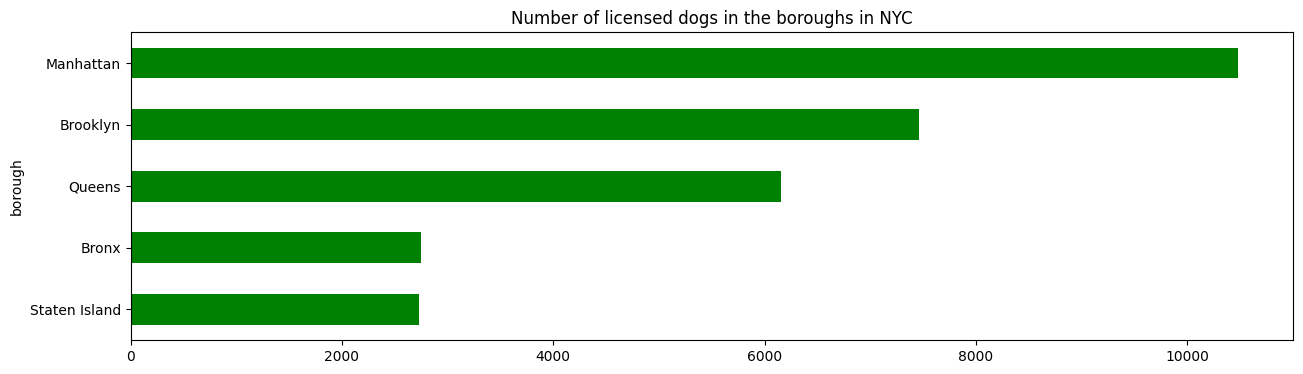

In [ ]:
(
merged['borough']
.value_counts()                
.sort_values(ascending=True) 
.plot(
    kind='barh',
    color='green',
    title='Number of licensed dogs in the boroughs in NYC',
    figsize=(15,4)
    )
)

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [133]:
#reading the data
boroghs_df = pd.read_csv('boro_population.csv')
boroghs_df.head()

#merging with merrged df
merged2 = merged.merge(boroghs_df, left_on='borough', right_on='borough')
merged2.head()

#borough with highest number of dogs per capita
merged2.groupby('borough')['population'].first()

borough
Bronx            1455444
Brooklyn         2636735
Manhattan        1644518
Queens           2339150
Staten Island     474558
Name: population, dtype: int64

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? This is very crazy, so ask in Slack, or a TA, or our buddy ChatGPT.

In [145]:
#top 5 breeds of dogs for each borough
dog_breeds = (
    merged.groupby(['borough', 'Primary Breed'])
    .size()                           
    .reset_index(name='count')        
    .sort_values(['borough', 'count'], ascending=[True, False])
    .groupby('borough')
    .head()                          
)
dog_breeds


,borough,Primary Breed,count
145,Bronx,Yorkshire Terrier,250
128,Bronx,Shih Tzu,244
41,Bronx,Chihuahua,208
7,Bronx,American Pit Bull Terrier/Pit Bull,181
90,Bronx,Maltese,139
353,Brooklyn,Yorkshire Terrier,501
325,Brooklyn,Shih Tzu,481
198,Brooklyn,Chihuahua,391
262,Brooklyn,Labrador Retriever,255
267,Brooklyn,Maltese,247


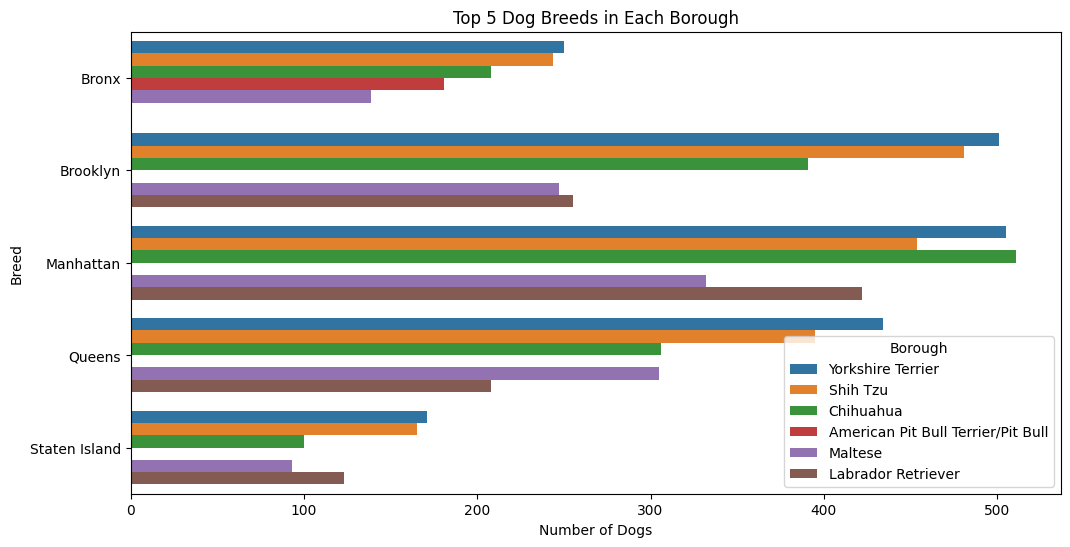

In [148]:
#bar chart

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(
    data=dog_breeds,
    x='count',
    y='borough',
    hue='Primary Breed',
    dodge=True
)
plt.title('Top 5 Dog Breeds in Each Borough')
plt.xlabel('Number of Dogs')
plt.ylabel('Breed')
plt.legend(title='Borough')
plt.show()

